## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил: _Золотарев Антон Олегович_

### Общая информация

__Дата выдачи:__ 11.02.2020

__Дедлайн:__ 21.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [148]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [6]:
def result_mark(weights: np.array, marks: np.array) -> int:
    x=np.dot(weights, marks)
    return int(x.sum(axis=0)+0.5)

In [7]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [8]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [9]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3]=number
    return array

In [10]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [11]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [12]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    logic = np.abs(array1 - array2) <= precision
    answer = np.arange(len(array1))
    return answer[logic]

In [34]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [35]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [42]:
def block_matrix(block: np.array) -> np.array:
    block_2=np.concatenate([block, block], axis=0)
    return np.concatenate([block_2, block_2], axis=1)

In [45]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
             [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [95]:
def diag_prod(matrix: np.array) -> int:
    a=np.diagonal(np.where(matrix!=0, matrix, 1))
    return np.prod(a)

In [97]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [103]:
def normalize(matrix: np.array) -> np.array:
    stand=np.where((np.std(matrix, axis=0)!=0), np.std(matrix, axis=0), 1)
    return (matrix-np.mean(matrix, axis=0))/stand

In [112]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [113]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [12]:
def antiderivative(coefs: np.array) -> np.array:
    ind=np.arange(len(coefs))
    TrueCoef=np.where(coefs!=0, coefs/(len(coefs)-ind), float(0))
    return np.concatenate([TrueCoef, np.zeros(1)])

In [15]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [16]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [21]:
def make_symmetric(matrix: np.array) -> np.array:
    t_matrix=matrix.transpose()
    return matrix+t_matrix-np.diag(matrix)*np.eye(len(matrix), dtype=int)

In [23]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [24]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [49]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    val=np.arange(a, b+1)
    mat = np.full((m, b-a+1), val)
    return mat

In [51]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [52]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [60]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    prod12=vec1@vec2
    sum12=prod12.sum()
    kv1=vec1**2
    kv2=vec2**2
    sqrt1=np.sqrt(kv1.sum())
    sqrt2=np.sqrt(kv2.sum())
    return sum12/(sqrt1*sqrt2)

In [62]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [63]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [64]:
data = pd.read_csv('train.csv', delimiter=',')

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


# Типы переменных
PassengerId (номер пассажира) - номинальный порядковый тип    

**Survived (выжил ли?)** - категориальный или бинарный тип  признака    

**Pclass (класс билета)** - порядковый ранговый тип признака

**Name (имя пассажира)** - категориальный тип признака

**Sex (пол пассажира)**  - категориальный или бинарный тип признака

**Age (возраст пассажира)**  - количественный признак с абсолютной шкалой (вещественный)

**SibSp (количество супруг или родных братьев/сестер на борту)** - порядковый ранговый тип признака 

**Parch (количество родителей или детей на борту)** - порядковый ранговый тип признака

**Ticket (номер билета)** - номинальный порядковый тип   

**Fare (цена билета)**  - количественный признак с абсолютной шкалой (вещественный)

**Cabin (номер каюты)** - номинальный порядковый тип   

**Embarked (порт отправления)** - категориальный тип   

# Возможные для решения задачи

1. Задача регрессии
   
   Взять факт того, выжил ли человек по итогам кораблекрушения, за зависимую переменную и попытаться построить модель, описывающую наиболее влияющие на этот показатель факторы (класс билета, его стоимость, наличие родственников на борту).


2. Задача классификации
    
    Построить предиктивную модель, оценивающую вероятность человека выжить в результате кораблекрушения в зависимости от значений других показателей. Обучить на обучающей выборке и проверить на тестовой. Или же, чтобы не повторяться с задачей регрессии, попытаться предсказать цену билета по уровню класса и факту выживания по результатам кораблекрушения.


3. Задача кластеризации
    
    Попытаться понять цель поездки на данном корабле пассажиров "Титаника" и разделить их на следующие классы: путешествие/отдых, командировка, работа(является членом экипажа) и др.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

Доля выживших от общего числа пассажиров: 0.38


([<matplotlib.patches.Wedge at 0x24329a65320>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Выжившие'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Умершие')])

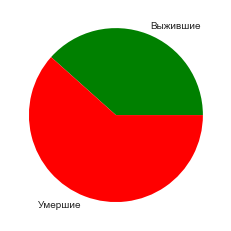

In [87]:
died, surv = data['Survived'].value_counts()
print('Доля выживших от общего числа пассажиров:', round(surv/(died+surv), 2))
plt.pie([surv/(died+surv), died/(surv+died)], labels=['Выжившие', 'Умершие'], colors=['green', 'red'])

Доля выживших мужчин: 0.32
Доля выживших женщин: 0.68


([<matplotlib.patches.Wedge at 0x24329a1f2b0>,
 [Text(0.5931585112380521, 0.9263708655532393, 'Мужчины'),
  Text(-0.5931584245049494, -0.9263709210887432, 'Женщины')])

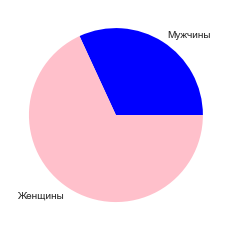

In [89]:
man_alive = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]
portion_m_a=len(man_alive)/surv
print('Доля выживших мужчин:', round(portion_m_a, 2))
print('Доля выживших женщин:', round(1-portion_m_a, 2))
plt.pie([portion_m_a, 1-portion_m_a], labels=['Мужчины', 'Женщины'], colors=['blue', 'pink'])

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [24]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [90]:
man_3c=len(data[(data['Pclass'] == 3) & (data['Sex'] == 'male')])
women_3c=len(data[(data['Pclass'] == 3) & (data['Sex'] == 'female')])


print('В третьем и самом многолюдном классе мужчин было ', man_3c,', а женщин - ', women_3c, 
      '. Таким образом, мужчин было в несколько раз больше, чем женщин.', sep='')

В третьем и самом многолюдном классе мужчин было 347, а женщин - 144. Таким образом, мужчин было в несколько раз больше, чем женщин.


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [36]:
data['Fare'].min()

0.0

In [37]:
data['Fare'].max()

512.3292

In [91]:
round(data['Fare'].mean(), 2)

32.2

In [43]:
data['Fare'][data['Embarked'] == 'S'].min()

0.0

In [44]:
data['Fare'][data['Embarked'] == 'S'].max()

263.0

In [92]:
round(data['Fare'][data['Embarked'] == 'S'].mean(), 2)

27.08

# Графики

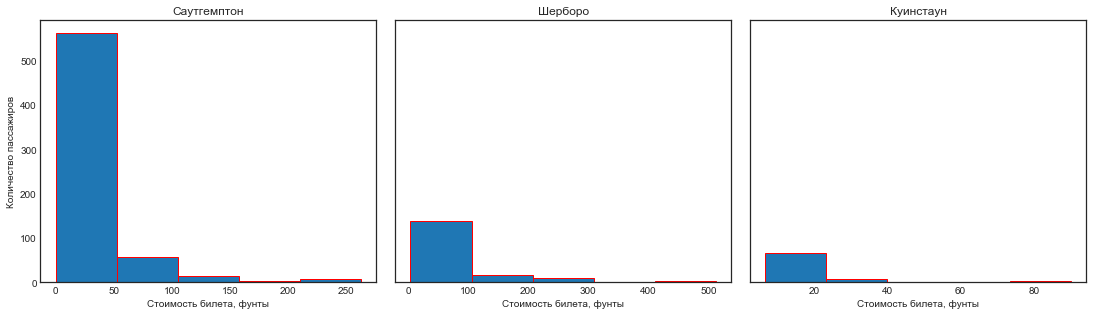

In [167]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 4))

fig.tight_layout(pad=0.5)
ax[0].set_ylabel('Количество пассажиров')

ax[0].hist(data['Fare'][(data['Embarked'] == 'S')], bins=5, edgecolor='red')
ax[0].set_xlabel('Стоимость билета, фунты')
ax[0].set_title('Саутгемптон')

ax[1].hist(data['Fare'][(data['Embarked'] == 'C')], bins=5, edgecolor='red')
ax[1].set_xlabel('Стоимость билета, фунты')
ax[1].set_title('Шерборо')

ax[2].hist(data['Fare'][(data['Embarked'] == 'Q')], bins=5, edgecolor='red')
ax[2].set_xlabel('Стоимость билета, фунты')
ax[2].set_title('Куинстаун')

plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

**Ответ**: Нет, поскольку номер билета или каюты, имя или номер пассажира вряд ли могут пригодиться для существенного анализа имеющейся информации, объясняющего или проверяющего те или иные закономерности.

In [65]:
mod_data = data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)

In [66]:
mod_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [67]:
#Есть ли пропуски во всей базе данных?
data.isnull().any().any()

True

In [68]:
#В каких столбцах пропущены значения?
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [93]:
print('Age:', sum(data['Age'].isnull()))
print('Cabin:', sum(data['Cabin'].isnull()))
print('Embarked:', sum(data['Embarked'].isnull()))

Age: 177
Cabin: 687
Embarked: 2


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

В соответствии с курсом демографии, освоенным раннее в НИУ ВШЭ, мы изучили, что пропуски в возрасте, во имя сохранения структуры всей генеральной совокупности, следует исправлять так: объединяем всех пассажиров корабля по 5-летним возрастным интервалам -> умножаем количество пропусков на долю пассажиров в каждом из интервалов ->  прибавляем получившиеся значения к исходным интервалам, придав ранее пропущенным значениям серединное значение 5-летнего интервала:

In [98]:
age_structure = pd.cut(data['Age'], 16).value_counts()
age_structure

(20.315, 25.289]    122
(25.289, 30.263]    108
(15.341, 20.315]     96
(30.263, 35.236]     88
(35.236, 40.21]      67
(40.21, 45.184]      47
(0.34, 5.394]        44
(45.184, 50.158]     39
(50.158, 55.131]     24
(5.394, 10.368]      20
(10.368, 15.341]     19
(55.131, 60.105]     18
(60.105, 65.079]     14
(70.052, 75.026]      4
(65.079, 70.052]      3
(75.026, 80.0]        1
Name: Age, dtype: int64

In [184]:
data['Age'].fillna(sum(data['Age'].isnull())*age_structure/(891-177), inplace=True)

In [182]:
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna('S', inplace=True)

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

0.103 - таким образом, обнаружена незначительная положительная взаимосвязь между возрастом пассажира и ценой билета.


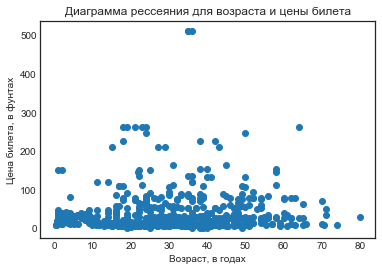

In [111]:
print(round(data['Age'].corr(data['Fare']), 3), '- таким образом, обнаружена незначительная положительная взаимосвязь между возрастом пассажира и ценой билета.')

plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Возраст, в годах')
plt.ylabel('Цена билета, в фунтах')
plt.title('Диаграмма рессеяния для возраста и цены билета')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [117]:
print(round(data['Survived'].corr(data['Fare']), 3), '- действительно, пассажиры с более дорогими билетами выживали чаще, поскольку им выдавались шлюпки в первую очередь.')

0.257 - действительно, пассажиры с более дорогими билетами выживали чаще, поскольку им выдавались шлюпки в первую очередь.


In [118]:
print(round(data['Survived'].corr(data['Pclass']), 3), '- действительно, пассажиры с более низким классом выживали реже, поскольку им выдавались шлюпки в последнюю очередь.')

-0.338 - действительно, пассажиры с более низким классом выживали реже, поскольку им выдавались шлюпки в последнюю очередь.


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [119]:
data['Family'] = data['SibSp'] + data['Parch'] + 1

Попробуем создать классификацию пассажиров, определив, кто ехал на Титанике с какими целями (отдых, работа на корабле, командировка в США, другое):

In [183]:
data['Aim'] = 'Unknown'
work_on_Titanic = data['Fare']==0
work_in_USA = (data['Fare']<data['Fare'].mean()) & (data['Age'] < 50) & (data['Age'] > 20)
relax = (data['Fare']>data['Fare'].mean()) & ((data['Age'] > 50) | (data['Age'] < 20))
data['Aim'][work_on_Titanic] = 'Work on Titanic'
data['Aim'][work_in_USA] = 'Work in USA'
data['Aim'][relax] = 'Relax'

C:\Users\481\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\481\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\481\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

**Задача:** исследовать корреляцию выживаемости пассажиров с остальными имеющимися признаками, чтобы составить портрет среднестатистического выжившего

In [135]:
mod_data.corrwith(data['Survived'])

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
dtype: float64

Таким образом, среднестатистический выживший имеет билет первого класса, не имеет родственников на борту, скорее молод, чем стар, заплатил весьма много за билет.

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

На графиках ниже отчётливо видно, что возрастная структура значительно отличается от распределения цен билетов, поскольку у первого вырисовывается что-то наподобие Хи-квадрат или логнормального распределения, тогда как у второго - экспоненциальное. 

Распределение возрастной структуры почти никак не отразится при анализе данных методами машинного обучения, однако выбросы в ценах (билеты дороже 100 фунтов) могут значительно сместить выборку при регрессионном восстановлении данного параметра, например.

Text(0.5, 1.0, 'Age of passengers')

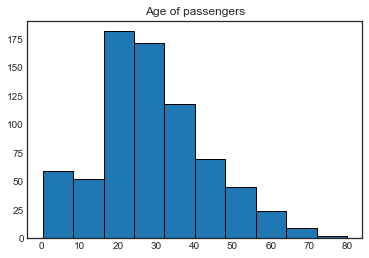

In [175]:
from math import log2

plt.hist(data['Age'], bins=int(1+log2(len(data))), edgecolor='black')
plt.title('Age of passengers')

Text(0.5, 1.0, 'Fare paid')

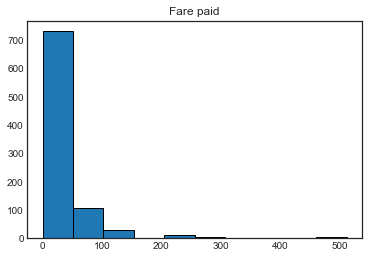

In [174]:
plt.hist(data['Fare'], bins=int(1+log2(len(data))), edgecolor='black')
plt.title('Fare paid')

In [176]:
Fare_mean = data['Fare'].mean()
Fare_std = data['Fare'].std()

mod_data['Fare'] = (data['Fare'] - Fare_mean) / Fare_std

Age_mean = data['Age'].mean()
Age_std = data['Age'].std()

mod_data['Age'] = (data['Age'] - Age_mean) / Age_std


Text(0.5, 1.0, 'Age of passengers')

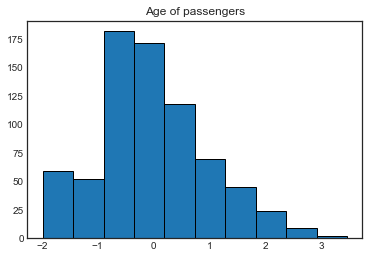

In [178]:
plt.hist(mod_data['Age'], bins=int(1+log2(len(data))), edgecolor='black')
plt.title('Age of passengers')

Text(0.5, 1.0, 'Fare paid normalized')

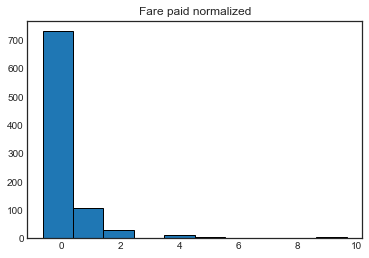

In [177]:
plt.hist(mod_data['Fare'], bins=int(1+log2(len(data))), edgecolor='black')
plt.title('Fare paid normalized')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

**Ответ** Нет, не у всех. Пол и город отправки закодированы строками

In [186]:
def cat_embarked(embarked: str) -> int:
  if embarked == 'S':
    return 1
  elif embarked == 'Q':
    return 2
  elif embarked ==  'C':
    return 3

data['Embarked'] = data['Embarked'].apply(cat_embarked)

def cat_sex(sex: str) -> int:
  if sex == 'male':
    return 1
  elif sex == 'female':
    return 0

data['Sex'] = data['Sex'].apply(cat_sex)


### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

C:\Users\481\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


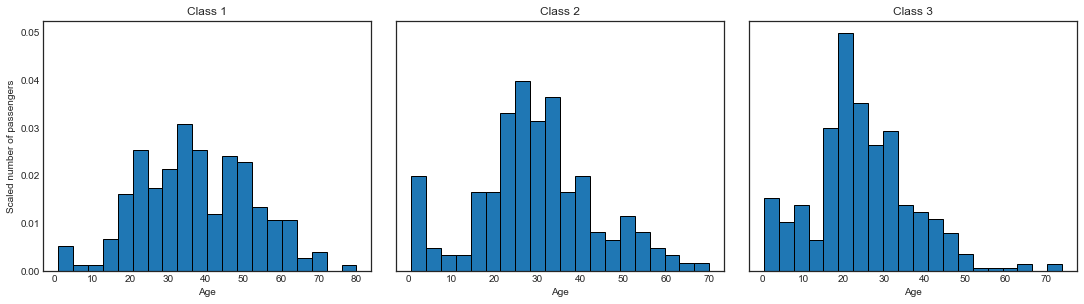

In [146]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 4))

fig.tight_layout()
ax[0].set_ylabel('Scaled number of passengers')

ax[0].hist(data[(data['Pclass'] == 1)]['Age'], bins=int(1+log2(len(data))), edgecolor='black', density=True)
ax[0].set_xlabel('Age')
ax[0].set_title('Class 1')

ax[1].hist(data[(data['Pclass'] == 2)]['Age'], bins=int(1+log2(len(data))), edgecolor='black', density=True)
ax[1].set_xlabel('Age')
ax[1].set_title('Class 2')

ax[2].hist(data[(data['Pclass'] == 3)]['Age'], bins=int(1+log2(len(data))), edgecolor='black', density=True)
ax[2].set_xlabel('Age')
ax[2].set_title('Class 3')

fig.show()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

C:\Users\481\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


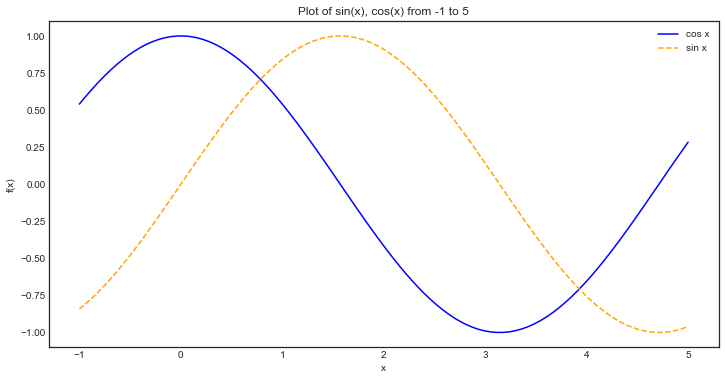

In [149]:
x = np.linspace(-1, 5, 100)
y1 = np.sin(x)
y2 = np.cos(x)
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.plot(x, y2, '-', color='blue', label='cos x')
ax.plot(x, y1, '--', color='orange', label='sin x')
leg = ax.legend();
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Plot of sin(x), cos(x) from -1 to 5')

fig.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

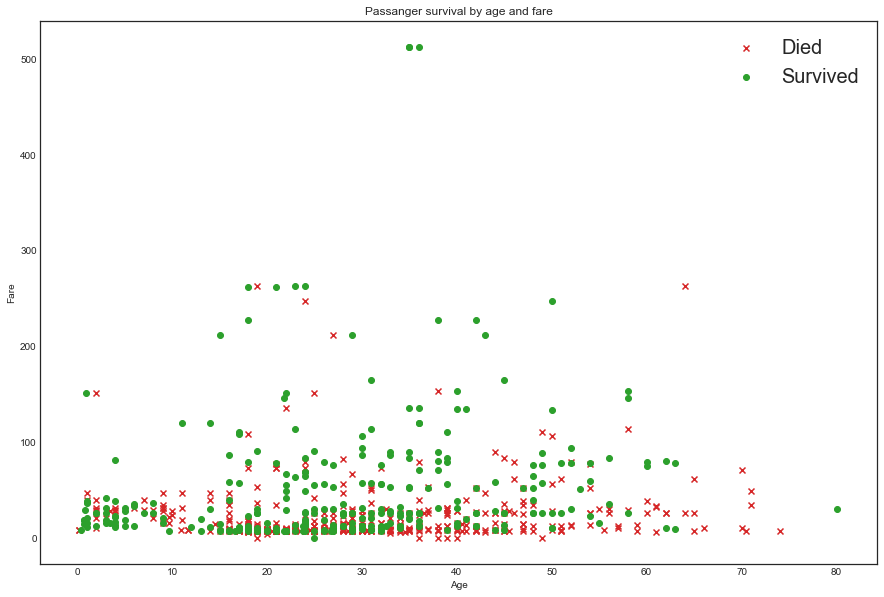

In [164]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in [(0, 'tab:red', "x"), (1, 'tab:green', "o")]:
    ax.set_title('Passanger survival by age and fare')
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    indicator = (data['Survived'] == i[0])
    ax.scatter(data[indicator]['Age'], data[indicator]['Fare'], c=i[1], marker=i[2])

ax.legend(['Died', 'Survived'], fontsize=20)
plt.show()